# STA 141B Assignment 1

Due __January 26, 2024__ by __11:59pm__. Submit your work by uploading it to Gradescope through Canvas.

Instructions:

1. Provide your solutions in new cells following each exercise description. Create as many new cells as necessary. Use code cells for your Python scripts and Markdown cells for explanatory text or answers to non-coding questions. Answer all textual questions in complete sentences.
2. The use of assistive tools is permitted, but must be indicated. You will be graded on you proficiency in coding. Produce high quality code by adhering to proper programming principles. 
3. Export the .jpynb as .pdf and submit it on Gradescope in time. To facilitate grading, indicate the area of the solution on the submission. Submissions without indication will be marked down. No late submissions accepted. 
4. The total number of points is 10. 

__Exercise 1__

This exercise will review basic concepts of programming. Only use pure python code and no methods (like `str.find`) that are optimized in, e.g., `C`. Likewise, do not use any packages except those suitable for parallelization in part (c). 



__(a)__ Write a recursive function `seq_count(x, ...)` that returns length of the longest subsequence of identical elements in the sequence object `x`. Run: 
```
seq_count([[1], [1], [1], 1, 3, 3, 2, 2, 4, 0])
seq_count(('G', 'g', 'a', "a", "a", '''a''', 2, 's', 's'))
seq_count([3, 1, int(True), 1, 1, 1, 3, 3])
seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))
```

In [2]:
def seq_count(x, curr_count = 1, max_count = 1, curr_char = None):
    if not x:
        return max_count
    if x[0] == curr_char:
        curr_count += 1
    else:
        curr_count = 1
    max_count = max(curr_count, max_count)
    return seq_count(x[1:], curr_count, max_count, x[0])
    

In [3]:
seq_count([1, 3, 1, 1, 3, 3, 4, 4, 4])

3

In [8]:
# seq_count([[1], [1], [1], 1, 3, 3, 2, 2, 4, 0])
#seq_count(('G', 'g', 'a', "a", "a", '''a''', 2, 's', 's'))
#seq_count([3, 1, int(True), 1, 1, 1, 3, 3])
#seq_count((1, 3, None, 3, 3, 1, 3, 3, 4, 0))
seq_count((1, 3, 1, 1, 1, '1', 1, [3, 3, 3, 3], 3, 4, 0))

3

__(b)__ Write a function `pattern_count(x, pattern, ...)` that takes the two iterable objects `x` and `pattern` and returns the length of the longest subsequence of `pattern`. Run: 
```
pattern_count('CGGACTACTAGACT', 'ACT')
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])
pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))
```

In [81]:
def pattern_count(sequence, pattern):
    # Initialize variables to keep track of current match and longest match
    current_count = 0
    max_count = 0
    pattern_counter = 0
    for i in sequence:
        if i == pattern[pattern_counter]:
            pattern_counter += 1
            if pattern_counter == len(pattern):
                current_count += 1
                max_count = max(current_count, max_count)
                pattern_counter = 0
        else:
            current_count = 0
    return max_count   

    # Iterate through the sequence
print(pattern_count('CGGACTACTAGACT', 'ACT'))
print(pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1]))
print(pattern_count(['ab', 'ab', 'a', 'a', 'b'], ('ab',))) 
        

2
2
2


In [77]:
pattern_count([0, 1, 2, 1, 2, 3, 1, 2, 1, 2, 1, 2, 4, 1, 2], (1, 2)) #should be 3

3

In [78]:
pattern_count([], [2])

0

In [82]:
pattern_count(['ab', 'ab', 'a', 'a', 'b'], 'ab') # elements in pattern must be identical to elements in x! 

1

In [80]:
pattern_count((1, (1, 1, 1, 1), 2, 1, 1, 1), [1, 1])

2

__(c)__ For a long string, write code that takes strings `x`, `pattern`, and an integer `n_splits`, and uses a suitable concurrency method to search for repeating patterns using `pattern_count` from (b). 
To this end, partition `x` into `n_splits` parts and search each of them individually. Make sure not to split where a pattern is present! Run: 
```
from random import choices, seed

seed(2024)
x = "".join(choices('01', k = 5_000))
pattern = "01"
n_splits = 50

# here is your code 
```

_Hint: You can use the fast `x.find(pattern)` to check your code._

In [ ]:
from random import choices, seed

seed(2024)
x = "".join(choices('01', k = 5_000))
pattern = "01"
n_splits = 50
def long_pattern(x, pattern, n_splits):
    per_sec_count = len(x)/n_splits
    
# here is your code 

__Exercise 2__

In this exercise, we will generate (pseudo-)random numbers using the inversion and accept-reject method. In order to generate the random numbers you are only allowed draw from the Uniform distribution and use
```
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
from scipy.stats import probplot
import pandas as pd
import matplotlib.pyplot as plt
```

_Inversion method: Let $F$ be a distribution function from which we want to draw. Define the quantile function $F^{-1}(u) = \inf\{x\colon F(x)\geq u, 0\leq u\leq 1\}$. Then, if $U\sim Unif[0,1]$, $F^{-1}(U)$ has distribution function $F$._

_Accept-reject: Let $f$ be a density function from which we want to draw and there exists a density $g$ from which we can draw (e.g., via the inversion method) and for which there exists a constant $c$ such that $f(x)\leq cg(x)$ for all $x$. The following algorithm generates a random variable $X$ with density function $f$._

1. Generate a random variable $X$ from density $g$
2. Generate a random variable $U\sim Unif[0,1]$ (independent from $X$)
3. If $Ucg(X) \leq f(X)$, return $X$, otherwise repeat 1.-3.

_The number of iterations needed to successfully generate $X$ is itself a random variable,
which is geometrically distributed with the success (acceptance) probability $p = P(Ucg(X)\leq f(X))$. Hence, the expected number of iterations is $1/p$. Some calculations show that $p = 1/c$._


__(a)__ Generate $10 000$ samples from $Bin(10, 0.4)$ using __(i)__ the inversion method directly and __(ii)__ using the inversion method to draw corresponding Bernoulli distributed samples. __(iii)__ Plot the resulting empirical distribution functions and add the theoretical distribution function in one figure. 

In [7]:
from random import uniform
from scipy.special import binom
from numpy import sqrt, pi, exp, tan, cumsum
from scipy.stats import probplot, binom
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
def direct_inverse_method(n, p, sample_size):
    values = []
    for i in range(sample_size):
        u = uniform(0,1)
        inversed_u = binom.ppf(u, n, p) #this gives the inverse cdf of each value
        values.append(inversed_u)
    return values

direct_inverse_samples = direct_inverse_method(10, 0.4, 10000)

We will first get values using the inverse method function defined in part 1. Then, divide each value by 10 to get a probability value, and if those values are greater than 0.4 which is the threshold earlier defined, it will take a value of 1 (success) or else a 0 (fail)

In [47]:
inverse_samples = direct_inverse_method(10, 0.4, 10000)
new_inverse_samples = list(map(lambda x: x/10, inverse_samples))
bernoulli_samples = list(map(lambda x: 1 if x >= 0.4 else 0, new_inverse_samples))
    

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(direct_inverse_samples, density=True, alpha=0.5)
plt.plot([0,1,2,3,4,5,6,7,8,9,10], binom.pmf(x, 10, 0.4), 'go-')
plt.title('Direct Inverse Method')
plt.show()


In [ ]:
plt.hist(bernoulli_samples, density=True)
plt.title('Inverse Bernoulli Samples')

__(b)__ Generate $10000$ samples from the standard normal distribution using the accept-reject method with candidate density $g(x) = (\pi(1+x^2))^{-1}$ with distribution funciton $G(x) = \tan^{-1}(x)/\pi$ from the standard Cauchy distribution. To this end, __(i)__ determine (mathematically or via simulation) the value of $c\geq1$ closest to one so that $f(x)\leq cg(x)$ for all $x$. __(ii)__ Obtain $10000$ standard normal random variables using the accept-reject method, generating Cauchy distributed random variables using inversion method. 
__(iii)__ Compare estimated and theoretical acceptance probabilities. 
__(iv)__ Generate a QQ-plot of the generated sample. 

In [92]:
#To find c, simulate 10,000 x values and find the max ratio where c >= f(x) / g(x)
sim_x  = [-5 + (i/(1000)) for i in range(10000)]
sim_x = pd.Series(sim_x)
def ratio_calc(x):
    f_x = exp(-x**2 / 2) / sqrt(2 * pi)
    g_x = 1 / (pi * (1 + x**2))
    return f_x/g_x
result_x = sim_x.apply(ratio_calc)
c = max(result_x)
print(c)


1.520346901066281


Using a simulation where we generating equally spaced values from -5 to 5, we put each value into the f(x) and g(x), took the ratio of the two for each x value and got the maximum ratio from all 10000 values to get a c value of approximately 1.5203


In [96]:
#part 2 (ii)
#inverse of G(x) is tan(pi * u)
nums = []
tot_generated = 0
c = 1.52034
while len(nums) < 10000:
    init_val = uniform(0,1)
    X = tan(pi * init_val)
    U = uniform(0,1)
    Ucg = U * c * (pi*(1 + (X**2)))**(-1)
    fx = (1/sqrt(2*pi))* exp(-(X**2)/2)
    if Ucg <= fx:
        nums.append(X)
    tot_generated += 1
print(tot_generated)  




15196


iii\)  As can be seen previously, in order to generate 10000 values, 15196 total values were generated. 10000/15196 = 0.65806 which means about a 66% acceptance rate. The theoretical acceptance rate is approximately 1/c, which is 1/1.52034 = 0.65775 which is also about a 66% acceptance rate, so they are pretty similar.

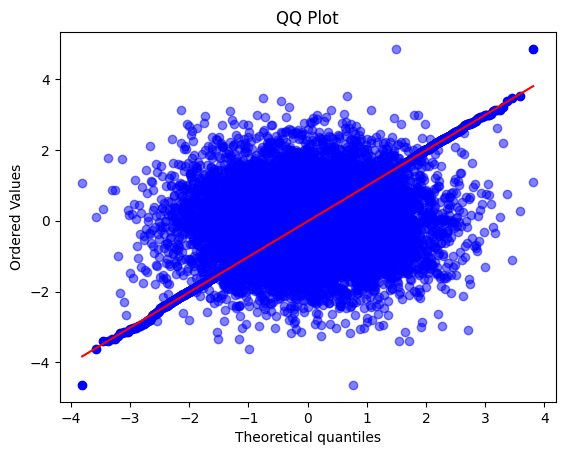

In [98]:
theor_quant = probplot(nums, plot=plt)[0][0]
plt.scatter(theor_quant, nums, color='blue', alpha=0.5)
plt.title('QQ Plot')
plt.show()

__Exercise 3__

The demographic makeup of regions can offer crucial insights into various socio-economic factors. For policymakers, understanding age distributions can be particularly useful, as it can provide direction for initiatives ranging from educational policy to elderly care. In this section, we will work with a dataset detailing the age distribution across United States counties, broken down into specific age bins.

The files `county_age_dist.csv`, `fips_state.csv` and `fips_county.csv` contain information about the age distribution of counties in selected brackets as well as names and [FIPS](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) codes and additional information. 

__(a, i)__ Merge all three data frames into one `pandas.DataFrame` object names `data` with appropriate column names. __(ii)__ Remove the `info` column. Standardize column names and entries to be capitalized according to spelling rules. Remove any preceding whitespace if present for any entries. Run: 
```
data.head(4)
```

In [254]:
import pandas as pd
county_age = pd.read_csv('county_age_dist.csv') #3220 lines
fips_county = pd.read_csv('fips_county.csv') #3199 lines
fips_state = pd.read_csv('fips_state.csv') #51 lines
print(county_age.head(), fips_county.head(), fips_state.head())

   fips   0-17  18-24  25-34  35-44  45-54  55-64  65-74  75-84   85+
0  1001  25941  11422  12315  13828  14000  12697   9594   5430  1945
1  1003  86587  37568  44133  46730  49675  52405  43252  23262  8854
2  1005  11057   6162   6603   5907   6490   6377   5255   2795  1074
3  1007   9671   5241   5788   5472   6707   5563   4270   2555   638
4  1009  25671  11360  12635  13570  14737  14123  12106   6560  2022     fips             name  info
0  01000          Alabama   NaN
1  01001   Autauga County   NaN
2  01003   Baldwin County   NaN
3  01005   Barbour County   NaN
4  01007      Bibb County   NaN       FIPS; STATE
0     01; ALABAMA
1      02; ALASKA
2     04; ARIZONA
3    05; ARKANSAS
4  06; CALIFORNIA


In [255]:
print(county_age.columns, fips_county.columns, fips_state.columns)

Index(['fips', '0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74',
       '75-84', '85+'],
      dtype='object') Index(['fips', ' name', ' info'], dtype='object') Index(['FIPS; STATE'], dtype='object')


In [256]:
county_age['fips'] = county_age['fips'].astype(str).str.zfill(5)
data = pd.merge(county_age, fips_county, how='outer', on='fips')

In [257]:
fips_value_placeholder = data['fips']
data['fips'] = data['fips'].astype(str).str[:2]


In [258]:
fips_state[['fips', 'state']] = fips_state['FIPS; STATE'].str.split('; ', expand=True)
fips_state = fips_state.drop('FIPS; STATE', axis=1)
fips_state.head()

,fips,state
0,01,ALABAMA
1,02,ALASKA
2,04,ARIZONA
3,05,ARKANSAS
4,06,CALIFORNIA


In [259]:
data = pd.merge(data, fips_state, how = 'outer', on='fips')
data.head()

,fips,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,name,info,state
0,01,25941.0,11422.0,12315.0,13828.0,14000.0,12697.0,9594.0,5430.0,1945.0,Autauga County,NaN,ALABAMA
1,01,86587.0,37568.0,44133.0,46730.0,49675.0,52405.0,43252.0,23262.0,8854.0,Baldwin County,NaN,ALABAMA
2,01,11057.0,6162.0,6603.0,5907.0,6490.0,6377.0,5255.0,2795.0,1074.0,Barbour County,NaN,ALABAMA
3,01,9671.0,5241.0,5788.0,5472.0,6707.0,5563.0,4270.0,2555.0,638.0,Bibb County,NaN,ALABAMA
4,01,25671.0,11360.0,12635.0,13570.0,14737.0,14123.0,12106.0,6560.0,2022.0,Blount County,NaN,ALABAMA


In [260]:
data['fips'] = fips_value_placeholder
data = data.drop(' info', axis = 1)
data['state'] = data['state'].str.lower().str.capitalize()
data.rename(columns={'fips': 'FIPS'}, inplace=True)
data.rename(columns={' name': 'Name'}, inplace=True)
data.rename(columns={'state': 'State'}, inplace=True)
data.head()

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State
0,01001,25941.0,11422.0,12315.0,13828.0,14000.0,12697.0,9594.0,5430.0,1945.0,Autauga County,Alabama
1,01003,86587.0,37568.0,44133.0,46730.0,49675.0,52405.0,43252.0,23262.0,8854.0,Baldwin County,Alabama
2,01005,11057.0,6162.0,6603.0,5907.0,6490.0,6377.0,5255.0,2795.0,1074.0,Barbour County,Alabama
3,01007,9671.0,5241.0,5788.0,5472.0,6707.0,5563.0,4270.0,2555.0,638.0,Bibb County,Alabama
4,01009,25671.0,11360.0,12635.0,13570.0,14737.0,14123.0,12106.0,6560.0,2022.0,Blount County,Alabama


__(b)__ For each county and state, compute the proportion of elderly `CPE` and `SPE` (65 and older) to the total population as well as the proportion of young people `CPY` and `SPY` (24 or younger). Add those values to the data frame. You may ignore all FIPS regions that are not in states. Run: 
```
data.head(4)
```

In [261]:
data.iloc[:, 1:10] = data.iloc[:, 1:10].apply(pd.to_numeric, errors='coerce')
data.head

<bound method NDFrame.head of        FIPS     0-17    18-24    25-34    35-44    45-54    55-64    65-74  \
0     01001  25941.0  11422.0  12315.0  13828.0  14000.0  12697.0   9594.0   
1     01003  86587.0  37568.0  44133.0  46730.0  49675.0  52405.0  43252.0   
2     01005  11057.0   6162.0   6603.0   5907.0   6490.0   6377.0   5255.0   
3     01007   9671.0   5241.0   5788.0   5472.0   6707.0   5563.0   4270.0   
4     01009  25671.0  11360.0  12635.0  13570.0  14737.0  14123.0  12106.0   
...     ...      ...      ...      ...      ...      ...      ...      ...   
3281   1990  27016.0  14455.0  14882.0  14168.0  15026.0  14450.0  11928.0   
3282  53000   4724.0   2727.0   2092.0   2356.0   2496.0   2972.0   2364.0   
3283  54000  11353.0   6431.0   5521.0   5319.0   5788.0   6228.0   4631.0   
3284  55000  16068.0   9025.0   8465.0   9199.0   9548.0   9805.0   7926.0   
3285  56000  17375.0   8974.0   9422.0   9457.0  10028.0  10672.0   8571.0   

        75-84     85+            

In [262]:
data['CPY'] = (data.iloc[:, 1:6].sum(axis = 1)) / (data.iloc[:,1:10].sum(axis = 1))
data['CPE'] = (data.iloc[:, 6:10].sum(axis = 1)) / (data.iloc[:,1:10].sum(axis = 1))
data.head()

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State,CPY,CPE
0,01001,25941.0,11422.0,12315.0,13828.0,14000.0,12697.0,9594.0,5430.0,1945.0,Autauga County,Alabama,0.723193,0.276807
1,01003,86587.0,37568.0,44133.0,46730.0,49675.0,52405.0,43252.0,23262.0,8854.0,Baldwin County,Alabama,0.674435,0.325565
2,01005,11057.0,6162.0,6603.0,5907.0,6490.0,6377.0,5255.0,2795.0,1074.0,Barbour County,Alabama,0.700290,0.299710
3,01007,9671.0,5241.0,5788.0,5472.0,6707.0,5563.0,4270.0,2555.0,638.0,Bibb County,Alabama,0.716240,0.283760
4,01009,25671.0,11360.0,12635.0,13570.0,14737.0,14123.0,12106.0,6560.0,2022.0,Blount County,Alabama,0.691348,0.308652


In [263]:
pop_by_state = data.groupby('State')[['0-17', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '85+']].sum()
pop_by_state['Total Pop'] = pop_by_state.iloc[:,:].sum(axis=1)
pop_by_state = pop_by_state.drop(pop_by_state.columns[:9], axis=1)

In [264]:
pop_by_state

,Total Pop
State,
Alabama,9670608.0
Alaska,1383156.0
Arizona,13149489.0
Arkansas,5947364.0
California,74746038.0
Colorado,10366853.0
Connecticut,7212616.0
Delaware,1782091.0
District of columbia,1312611.0


In [265]:
data = data.merge(pop_by_state, on='State', how='left' )
data.head()

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State,CPY,CPE,Total Pop
0,01001,25941.0,11422.0,12315.0,13828.0,14000.0,12697.0,9594.0,5430.0,1945.0,Autauga County,Alabama,0.723193,0.276807,9670608.0
1,01003,86587.0,37568.0,44133.0,46730.0,49675.0,52405.0,43252.0,23262.0,8854.0,Baldwin County,Alabama,0.674435,0.325565,9670608.0
2,01005,11057.0,6162.0,6603.0,5907.0,6490.0,6377.0,5255.0,2795.0,1074.0,Barbour County,Alabama,0.700290,0.299710,9670608.0
3,01007,9671.0,5241.0,5788.0,5472.0,6707.0,5563.0,4270.0,2555.0,638.0,Bibb County,Alabama,0.716240,0.283760,9670608.0
4,01009,25671.0,11360.0,12635.0,13570.0,14737.0,14123.0,12106.0,6560.0,2022.0,Blount County,Alabama,0.691348,0.308652,9670608.0


In [266]:
data['SPY'] = (data.iloc[:,1:6].sum(axis=1)) / (data.iloc[:,-1])
data['SPE'] = (data.iloc[:,6:10].sum(axis=1)) / (data.iloc[:,-1])
data.head()

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State,CPY,CPE,Total Pop,SPY,SPE
0,01001,25941.0,11422.0,12315.0,13828.0,14000.0,12697.0,9594.0,5430.0,1945.0,Autauga County,Alabama,0.723193,0.276807,9670608.0,0.008015,3.701497e+06
1,01003,86587.0,37568.0,44133.0,46730.0,49675.0,52405.0,43252.0,23262.0,8854.0,Baldwin County,Alabama,0.674435,0.325565,9670608.0,0.027371,4.668210e+06
2,01005,11057.0,6162.0,6603.0,5907.0,6490.0,6377.0,5255.0,2795.0,1074.0,Barbour County,Alabama,0.700290,0.299710,9670608.0,0.003745,4.138825e+06
3,01007,9671.0,5241.0,5788.0,5472.0,6707.0,5563.0,4270.0,2555.0,638.0,Bibb County,Alabama,0.716240,0.283760,9670608.0,0.003400,3.831301e+06
4,01009,25671.0,11360.0,12635.0,13570.0,14737.0,14123.0,12106.0,6560.0,2022.0,Blount County,Alabama,0.691348,0.308652,9670608.0,0.008063,4.317437e+06


In [267]:
data = data.drop('Total Pop', axis = 1)

In [276]:
data.iloc[1027:1031,:] #different from the sample because i believe the sample did not account for total population

,FIPS,0-17,18-24,25-34,35-44,45-54,55-64,65-74,75-84,85+,Name,State,CPY,CPE,SPY,SPE
1027,21069,59756.0,23101.0,28431.0,30991.0,30735.0,27651.0,18464.0,8927.0,3291.0,Boone County,Kentucky,0.747855,0.252145,0.019756,2.952669e+06
1028,21071,8817.0,4008.0,4419.0,4414.0,5382.0,5203.0,4145.0,2505.0,928.0,Bourbon County,Kentucky,0.679039,0.320961,0.003088,4.139424e+06
1029,21073,20700.0,9781.0,11381.0,11861.0,12383.0,13059.0,9861.0,5498.0,2987.0,Boyd County,Kentucky,0.677934,0.322066,0.007548,4.160444e+06
1030,21075,11693.0,8112.0,5945.0,6435.0,7132.0,7345.0,5766.0,3434.0,1599.0,Boyle County,Kentucky,0.684238,0.315762,0.004490,4.041424e+06
